In [1]:
#Modelos que ser√£o testados para o projeto
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Valia√ß√£o dos parametros do modelo escolhido
from sklearn.model_selection import RandomizedSearchCV

#Serve para das os splits dos dados na valida√ß√£o
from sklearn.model_selection import KFold

#Separa a base de dados em treino e testes
from sklearn.model_selection import train_test_split

#Metricas para a avalia√ß√£o do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Manipula√ß√£o dos dados
import pandas as pd
import numpy as np

#Visualiza√ß√£o  de dados
import seaborn as sns
import matplotlib.pyplot as plt 

#Avalia√ß√£o de features
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../Dados/Base de Dados Tratada (insurance).csv", index_col=0)#Lendo base de dados tratada
df.head()

age     bmi  children      charges  chargeLog  sex_male  smoker_yes  \
0   19  27.900         0  16884.92400   9.734176     False        True   
1   18  33.770         1   1725.55230   7.453302      True       False   
2   28  33.000         3   4449.46200   8.400538      True       False   
3   33  22.705         0  21984.47061   9.998092      True       False   
4   32  28.880         0   3866.85520   8.260197      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False

Ap√≥s leitura dos dados, eu vou analisar quais das features tem as maiores influ√™ncias com a a target(chargeLog), mas primeiro irei separar as variaveis em treino e teste.

In [3]:
X=df.drop(["charges", "chargeLog"], axis=1)
y=df["chargeLog"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#Separando os dados em treino e teste


Feito a separa√ß√£o dos dados, vamos partir para a avalia√ß√£o das features e descobrir quais ser√£o as que teram maior impacto na target

In [4]:
X_train_constante = sm.add_constant(X_train)
# Converter todas as colunas booleanas para int (0 ou 1)
X_train_constante = X_train_constante.astype({
    'sex_male': int,
    'smoker_yes': int,
    'region_northwest': int,
    'region_southeast': int,
    'region_southwest': int
})

# Agora rode o modelo novamente
modeloStatsModel = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
print(modeloStatsModel.summary())

                            OLS Regression Results                            
Dep. Variable:              chargeLog   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     413.7
Date:                Thu, 01 May 2025   Prob (F-statistic):          7.72e-320
Time:                        15:49:36   Log-Likelihood:                -661.37
No. Observations:                1070   AIC:                             1341.
Df Residuals:                    1061   BIC:                             1386.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0463      0.082  

Ap√≥s a analise, percebesse que as features  que tem mais impacto na target s√£o: Age, Children, Smoker(yes). Logo vamos agora analisar a matriz de correla√ß√£o para termos mais certeza!

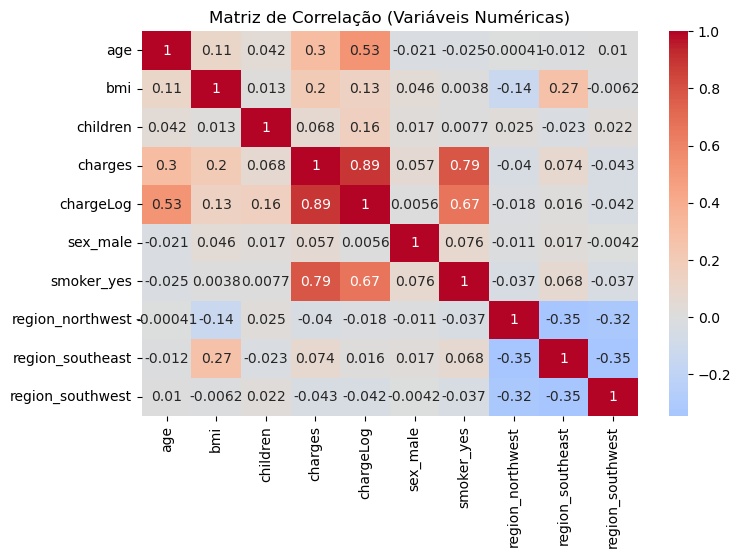

In [5]:
corr_matrix = df.corr()#Corrla√ß√£o entre as features
plt.figure(figsize=(8,5))#tamanho do gr√°fico
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)#Mapa de correla√ß√£o
plt.title('Matriz de Correla√ß√£o (Vari√°veis Num√©ricas)')
plt.show()

Ap√≥s a an√°lise do gr√©fico, fica n√≠tido que as variaveis citadas anteriormente tem um impacto significativo nos gastos do seguro. Agora vou come√ßar os teste com os modelos e ver qual se sai melhor!

In [6]:
def avaliaModelo(y_true, y_pred):
    metrics = {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R¬≤': r2_score(y_true, y_pred),
        'Adjusted R¬≤': 1 - (1-r2_score(y_true, y_pred))*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    }
    return metrics

def testaModeloRegre√ß√£o(X, y, modelo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    modelo = modelo()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    metricas = avaliaModelo(y_test, y_pred)
    print(modelo)
    for name, value in metricas.items():
        print(f"{name}: {value:.4f}")

In [7]:
X_train = X_train[["children", "age", "smoker_yes", "bmi"]]
testaModeloRegre√ß√£o(X_train, y_train, Lasso)
testaModeloRegre√ß√£o(X_train, y_train, LinearRegression)
testaModeloRegre√ß√£o(X_train, y_train, Ridge)
testaModeloRegre√ß√£o(X_train, y_train,RandomForestRegressor)
testaModeloRegre√ß√£o(X_train, y_train,XGBRegressor)

Lasso()
MSE: 0.6254
RMSE: 0.7908
MAE: 0.6436
R¬≤: 0.2665
Adjusted R¬≤: 0.2378
LinearRegression()
MSE: 0.2483
RMSE: 0.4983
MAE: 0.3013
R¬≤: 0.7088
Adjusted R¬≤: 0.6974
Ridge()
MSE: 0.2479
RMSE: 0.4979
MAE: 0.3014
R¬≤: 0.7092
Adjusted R¬≤: 0.6978
RandomForestRegressor()
MSE: 0.2363
RMSE: 0.4861
MAE: 0.2405
R¬≤: 0.7228
Adjusted R¬≤: 0.7120
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_

Ap√≥s a an√°lise dos reultados, nota-se que o RandomFerestRegressor se saiu melhor, ent√£o vou continuar com ele at√© o final. Vamos passar para o teste dos hiper parametros! Irei utilizar o RandomizedSeachCV pois o custo computacional com √© melhor!

In [8]:


# Espa√ßo de par√¢metros para busca
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', 0.8, None],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomSearch com valida√ß√£o cruzada
rf_random = RandomizedSearchCV(
    estimator=rf, #O modelo que ir√° ser usado
    param_distributions=param_dist, #os parametros que ser√£o testados
    n_iter=50, #Numeros de combina√ß√µes que v√£o ser testadas 
    cv=kf, #Como os dados ser√£o divididos
    scoring='neg_mean_absolute_error', #a metrtica que ser√° avaliada
    verbose=2, #Detakhes
    random_state=42,
    n_jobs=-1 #Controla o paralelismo da execu√ß√£o
)

rf_random.fit(X_train, y_train)

# Melhores par√¢metros
print("Melhores par√¢metros:", rf_random.best_params_)
print("Melhor MAE:", -rf_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores par√¢metros: {'n_estimators': 350, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.8, 'max_depth': 5, 'bootstrap': True}
Melhor MAE: 0.2074840695837808


Com a analise do MAE(Erro M√©dio Absoluto) percebe-se que houve uma redu√ß√£o significativa entre a baseline(24.84) para 20.74, o que mostra uma redu√ß√£o nos erros no modelo. Agora para finalizar, vou analisar a efici√™ncia do meu modelo com dados que ele nunca viu, isso vai coclocar ele aprova e vermos se vai se sair bem!

In [9]:
# Modelo com melhores par√¢metros
melhorModelo = rf_random.best_estimator_

# Avalia√ß√£o no teste
y_pred = melhorModelo.predict(X_test[["children", "age", "smoker_yes", "bmi"]])
maeTest = mean_absolute_error(y_test, y_pred)
r2Test = r2_score(y_test, y_pred)
rsmeTest = np.sqrt(mean_squared_error(y_test, y_pred))
#Metrica no conjunto de teste
print("M√âTRICAS DO MODELO COM OS DADOS DE TESTE")
print(f"MAE no conjunto de teste: {maeTest*100:.2f}%")
print(f"R2 no conjunto de teste: {r2Test*100:.2f}%")
print(f"RSME no conjunto de teste: {rsmeTest*100:.2f}%")
print("-="*20)

# Compara√ß√£o com baseline
print("COMPARA√á√ÉO COM O MODELO SEM HIPER PAR√ÇMETROS")
print(f"MAE: Melhoria sobre o modelo padr√£o: {(0.2484 - maeTest)/0.2484*100:.1f}%")
print(f"R2: Melhoria sobre o modelo padr√£o: {(r2Test - 0.7132)/0.7132*100:.1f}%")
print(f"RSME: Melhoria sobre o modelo padr√£o: {(0.4945 - rsmeTest)/0.4945*100:.1f}%")

M√âTRICAS DO MODELO COM OS DADOS DE TESTE
MAE no conjunto de teste: 19.65%
R2 no conjunto de teste: 85.86%
RSME no conjunto de teste: 35.65%
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
COMPARA√á√ÉO COM O MODELO SEM HIPER PAR√ÇMETROS
MAE: Melhoria sobre o modelo padr√£o: 20.9%
R2: Melhoria sobre o modelo padr√£o: 20.4%
RSME: Melhoria sobre o modelo padr√£o: 27.9%


O modelo ajustado com hiperpar√¢metros obteve resultados bastante expressivos no conjunto de dados de teste. Abaixo est√£o as principais m√©tricas alcan√ßadas, com suas interpreta√ß√µes:

1. **MAE (Mean Absolute Error)**: O modelo apresentou um MAE de 19,65%, o que significa que, em m√©dia, as previs√µes do modelo est√£o erradas em 19,65% em rela√ß√£o ao valor real. Essa m√©trica indica o n√≠vel de precis√£o geral do modelo, sendo especialmente √∫til para avaliar os erros absolutos m√©dios sem dar peso desproporcional a grandes desvios.

2. **R¬≤ (Coeficiente de Determina√ß√£o)**: O modelo obteve um R¬≤ de 85,86%, indicando que ele consegue explicar 85,86% da vari√¢ncia dos dados no conjunto de teste. Esse √© um resultado muito positivo e mostra que o modelo captura bem as rela√ß√µes entre as vari√°veis preditoras e a vari√°vel-alvo.

3. **RMSE (Root Mean Squared Error)**: Com um RMSE de 35,65%, o modelo teve um erro m√©dio quadr√°tico raiz relativamente baixo, o que refor√ßa sua capacidade de fazer previs√µes precisas e minimiza a influ√™ncia de grandes erros pontuais.

Al√©m disso, ao comparar esse modelo com o modelo padr√£o (sem ajuste de hiperpar√¢metros), observamos melhorias significativas:
- **MAE**: Redu√ß√£o de 20,9% no erro absoluto m√©dio.
- **R¬≤**: Aumento de 20,4% na explica√ß√£o da vari√¢ncia.
- **RMSE**: Redu√ß√£o de 27,9% no erro m√©dio quadr√°tico raiz.

Esses resultados evidenciam que o ajuste dos hiperpar√¢metros foi bem-sucedido, otimizando o desempenho geral do modelo.

Por fim, as vari√°veis mais influentes no modelo ajustado tamb√©m ser√£o analisadas para identificar quais caracter√≠sticas mais impactam as previs√µes do modelo e ajudar a interpretar os resultados em termos de decis√£o pr√°tica.

Text(0.5, 1.0, 'Import√¢ncia das Vari√°veis no Modelo (Cores por Influ√™ncia)')

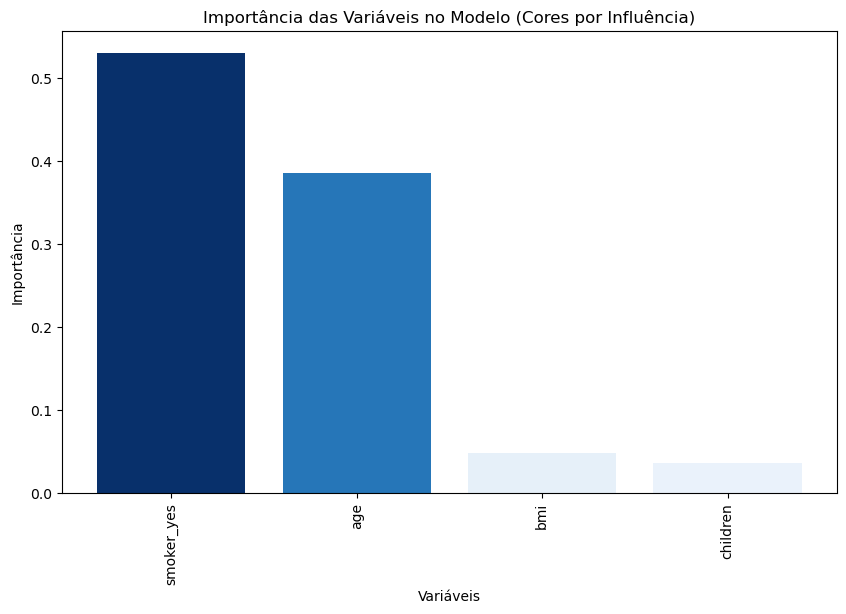

In [10]:


#Criando uma base de dados com os valores de influencia por coluna
colunasQueInfluenciamNaDecis√£o = {
    "Colunas" : X_train.columns,
    "Influencia" : melhorModelo.feature_importances_
}
colunasQueInfluenciamNaDecis√£o = pd.DataFrame(colunasQueInfluenciamNaDecis√£o)
ordenadoPorColunasQueInfluenciamNaDecis√£o = colunasQueInfluenciamNaDecis√£o.sort_values(by = "Influencia", ascending=False)


influencias = ordenadoPorColunasQueInfluenciamNaDecis√£o["Influencia"] / ordenadoPorColunasQueInfluenciamNaDecis√£o["Influencia"].max()

# Criar um gradiente de cores (quanto maior a import√¢ncia, mais escura a barra)
colors = plt.cm.Blues(influencias)  # Usando o colormap 'Blues'

# Plotar o gr√°fico de barras com cores baseadas na import√¢ncia
plt.figure(figsize=(10, 6))
bars = plt.bar(ordenadoPorColunasQueInfluenciamNaDecis√£o["Colunas"], ordenadoPorColunasQueInfluenciamNaDecis√£o["Influencia"] , color=colors)
plt.xticks(range(len(ordenadoPorColunasQueInfluenciamNaDecis√£o["Colunas"])), ordenadoPorColunasQueInfluenciamNaDecis√£o["Colunas"].values, rotation=90)
plt.xlabel('Vari√°veis')
plt.ylabel('Import√¢ncia')
plt.title('Import√¢ncia das Vari√°veis no Modelo (Cores por Influ√™ncia)')

Com base na an√°lise apresentada no gr√°fico, observa-se que as vari√°veis **"smoker_yes"** (indicando se o paciente √© fumante) e **"age"** (idade) possuem maior influ√™ncia nos custos dos seguros m√©dicos. Essas duas vari√°veis se destacam significativamente em rela√ß√£o √†s demais, como **"bmi"** (√≠ndice de massa corporal) e **"children"** (n√∫mero de filhos), que apresentam influ√™ncia muito menor.

Dessa forma, o modelo desenvolvido para prever os gastos m√©dicos dos pacientes identifica **o tabagismo e a idade como os principais fatores determinantes** para os custos. Essas vari√°veis devem, portanto, ser priorizadas nas an√°lises e recomenda√ß√µes relacionadas √† precifica√ß√£o ou pol√≠ticas de preven√ß√£o em sa√∫de.

## An√°lise com Dados Originais (Valida√ß√£o Complementar)

Para garantir a robustez dos resultados e permitir uma interpreta√ß√£o direta em valores monet√°rios, complementamos nossa an√°lise testando o modelo nos dados originais (sem transforma√ß√£o logar√≠tmica). Esta abordagem visa:

‚úì **Traduzir m√©tricas** para valores absolutos (R$) com significado pr√°tico imediato  
‚úì **Validar a consist√™ncia** das rela√ß√µes identificadas (tabagismo e idade como drivers principais)  
‚úì **Comparar desempenho** entre abordagens transformadas e n√£o transformadas  

### Metodologia

- **Modelo utilizado**: RandomForestRegressor com os mesmos hiperpar√¢metros otimizados  
- **M√©tricas calculadas**:
  - `MAE` (Erro Absoluto M√©dio em R$)  
  - `RMSE` (Raiz do Erro Quadr√°tico M√©dio em R$)  
  - `R¬≤` (Coeficiente de Determina√ß√£o)  



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
def evaluate_original_scale(y_true_log, y_pred_log):
    y_pred_orig = np.exp(y_pred_log)  # Assumindo log1p
    y_true_orig = np.exp(y_true_log)
    mae = mean_absolute_error(y_true_orig, y_pred_orig)
    mape = mean_absolute_percentage_error(y_true_orig, y_pred_orig) * 100
    r2 = r2_score(y_true_orig, y_pred_orig)
    rmse =np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    
    print(f"MAE: R$ {mae:.2f} ({mape:.2f}%)")
    print(f"R¬≤: {r2*100:.4f}%")
    print(f"RMSE na escala original: R$ {rmse:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


evaluate_original_scale(y_test, y_pred, )

MAE: R$ 1973.79 (18.05%)
R¬≤: 0.8789
RMSE na escala original: R$ 4.335,85


In [19]:
def evaluate_original_scale(y_true_log, y_pred_log):
    # Convers√£o para escala original
    y_true_orig = np.exp(y_true_log)
    y_pred_orig = np.exp(y_pred_log)
    
    # C√°lculo das m√©tricas
    metrics = {
        'MAE_R$': mean_absolute_error(y_true_orig, y_pred_orig),
        'MAE_%': mean_absolute_percentage_error(y_true_orig, y_pred_orig) * 100,
        'R2_%': r2_score(y_true_orig, y_pred_orig) * 100,
        'RMSE_R$': np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)),
        'Custo_M√©dio_R$': np.mean(y_true_orig)
    }
    
    # C√°lculo adicional de compara√ß√£o
    metrics['RMSE_%'] = (metrics['RMSE_R$'] / metrics['Custo_M√©dio_R$']) * 100
    
    # Formata√ß√£o de impress√£o profissional
    print("\n" + "="*60)
    print("AVALIA√á√ÉO DO MODELO NA ESCALA ORIGINAL (R$)".center(60))
    print("="*60)
    print(f"‚Ä¢ MAE (Erro Absoluto M√©dio):       R$ {metrics['MAE_R$']:,.2f} ({metrics['MAE_%']:.2f}%)".replace(",", "X").replace(".", ",").replace("X", "."))
    print(f"‚Ä¢ RMSE (Raiz do Erro Quadr√°tico):  R$ {metrics['RMSE_R$']:,.2f} ({metrics['RMSE_%']:.2f}%)".replace(",", "X").replace(".", ",").replace("X", "."))
    print(f"‚Ä¢ R¬≤ (Poder Explicativo):          {metrics['R2_%']:.2f}%")
    print(f"‚Ä¢ Custo M√©dio de Refer√™ncia:       R$ {metrics['Custo_M√©dio_R$']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    print("="*60)

# Exemplo de uso:
evaluate_original_scale(y_test, y_pred, )


        AVALIA√á√ÉO DO MODELO NA ESCALA ORIGINAL (R$)         
‚Ä¢ MAE (Erro Absoluto M√©dio):       R$ 1.973,79 (18,05%)
‚Ä¢ RMSE (Raiz do Erro Quadr√°tico):  R$ 4.335,85 (33,43%)
‚Ä¢ R¬≤ (Poder Explicativo):          87.89%
‚Ä¢ Custo M√©dio de Refer√™ncia:       R$ 12.968,32


### **An√°lise de Trade-offs no Modelo de Custos M√©dicos**  

#### **üìå Contexto do Projeto**  
Desenvolvi um modelo de previs√£o de custos m√©dicos usando **RandomForestRegressor** com uma base de **1.339 registros**. A vari√°vel target (`charges`) apresentava **assimetria acentuada**, ent√£o apliquei uma **transforma√ß√£o logar√≠tmica** para melhorar a performance do modelo.  

No entanto, mesmo ap√≥s ajustes, o **RMSE ficou em 33,43% do custo m√©dio**, indicando que alguns valores extremos (outliers) ainda impactavam significativamente as previs√µes.  

---

### **üîç Trade-off Enfrentado**  
**"Remover outliers para melhorar as m√©tricas ou mant√™-los para preservar casos clinicamente relevantes?"**  

| **Op√ß√£o**               | **Vantagens**                                     | **Desvantagens**                              |  
|-------------------------|---------------------------------------------------|-----------------------------------------------|  
| **Remover outliers**    | - Melhora MAE/RMSE artificialmente                | - Perde casos raros, por√©m importantes (ex: pacientes com custos excepcionais) |  
| **Manter outliers**     | - Preserva a integridade dos dados reais          | - M√©tricas menos otimizadas (RMSE mais alto)  |  

#### **Minha Decis√£o**  
Optei por **manter os outliers**, pois:  
‚úÖ **Reflete a realidade dos dados**: Custos m√©dicos t√™m varia√ß√µes extremas (ex: cirurgias complexas vs. consultas simples).  
‚úÖ **Evita vi√©s em casos cr√≠ticos**: Pacientes com custos altos s√£o justamente os que mais precisam de previs√£o acurada.  
‚úÖ **Transpar√™ncia**: Melhor comunicar um RMSE alto, mas realista, do que m√©tricas "infladas" por filtros excessivos.  

---

### **üìä Resultados e Interpreta√ß√£o**  
| **M√©trica**       | **Valor**       | **Significado**                                                                 |  
|-------------------|-----------------|---------------------------------------------------------------------------------|  
| **MAE**           | R$ 1.973,79 (18,05%) | Erro m√©dio "aceit√°vel" para o dom√≠nio de sa√∫de (valores reais variam muito).    |  
| **RMSE**          | R$ 4.335,85 (33,43%) | Indica a presen√ßa de outliers, mas **n√£o invalida** o modelo.                   |  
| **R¬≤**            | **87,89%**      | Excelente poder explicativo, mesmo com a varia√ß√£o natural dos dados.            |  


---

### **üéØ Mensagem Final**  
**"Um bom modelo n√£o √© s√≥ aquele com as melhores m√©tricas, mas o que melhor atende ao problema real."**  
Neste caso, priorizei **utilidade pr√°tica** sobre otimiza√ß√µes num√©ricas ‚Äì decis√£o comum em projetos de sa√∫de, onde dados "imperfeitos" muitas vezes carregam os insights mais valiosos.  
